#### test mcsm-membrane performance on membrane mutation pathogenic prediction: inconsistent with the results reported in the paper

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score,matthews_corrcoef
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
# load dataset
data_file = '../../datasets/annotation/mcsm_membrane_pathogenicity_blind.tsv'
df = pd.read_csv(data_file, sep = '\t')
df.head()

,PDB,MUTATION,CHAIN,CLASS,PRED
0,1P49.pdb,H444R,A,Pathogenic,Pathogenic
1,2HYN.pdb,R9C,A,Pathogenic,Pathogenic
2,2HYN.pdb,R9H,A,Pathogenic,Pathogenic
3,2LNL.pdb,M268L,A,Benign,Benign
4,2LZ3.pdb,I22V,A,Pathogenic,Pathogenic


In [3]:
# fetch label and AMscore
label = Y_test = np.array(df['CLASS'].replace('Pathogenic',1).replace('Benign',0))
pred  = np.array(df['PRED'].replace('Pathogenic',1).replace('Benign',0))
print(label.shape)
print(pred.shape)

(53,)
(53,)


AUC :  0.9245283018867925


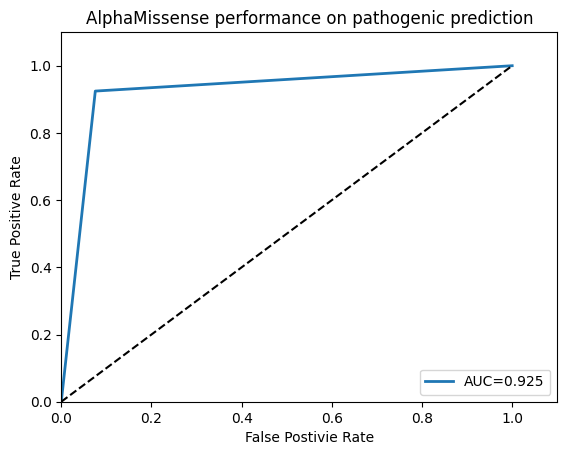

In [4]:
y_one_hot = to_categorical(Y_test)
y_score_pro = np.ones([pred.shape[0],2],dtype=float)
for i in range(pred.shape[0]):
    y_score_pro[i][0] = 1 - pred[i]
    y_score_pro[i][1] = pred[i]

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)

plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('AlphaMissense performance on pathogenic prediction')
plt.savefig('images/ROC-patho-mcsmmembrane.png',dpi=300, bbox_inches = 'tight')
plt.show()

[1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0]
[1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0]
confusion_matrix
 [[13  3]
 [ 1 36]]
accuracy:0.9245283018867925
precision:0.972972972972973
recall:0.9230769230769231
f1-score:0.9473684210526315
mcc:0.8178916570651413


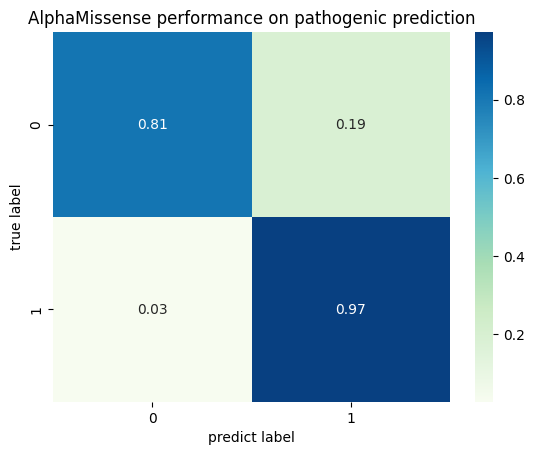

In [5]:
y_score = pred
y_score[y_score >= 0.5] = 1
y_score[y_score < 0.5] = 0

y_score_one_hot = to_categorical(y_score)

print(Y_test)
print(y_score)

obj1 = confusion_matrix(Y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(y_score, Y_test)))
print('precision:{}'.format(precision_score(y_score, Y_test)))
print('recall:{}'.format(recall_score(y_score, Y_test)))
print('f1-score:{}'.format(f1_score(y_score, Y_test)))
print('mcc:{}'.format(matthews_corrcoef(y_score, Y_test)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)

import seaborn as sns
sns.heatmap(new_obj, fmt='.2f', cmap='GnBu', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title('AlphaMissense performance on pathogenic prediction')
plt.savefig('images/CM-patho-mcsmmembrane.png',dpi=300, bbox_inches = 'tight')
plt.show()